In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('titanic_train.csv')
data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
data.shape

(891, 12)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
data.describe(include='object')


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


# Data Cleaning

# Handling Missing Data

In [11]:
data.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
data.isna().sum().sort_values(ascending=False)/len(data)*100


Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

In [13]:
data['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [14]:
data.drop(columns=['Cabin'], axis=1, inplace=True)

In [15]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

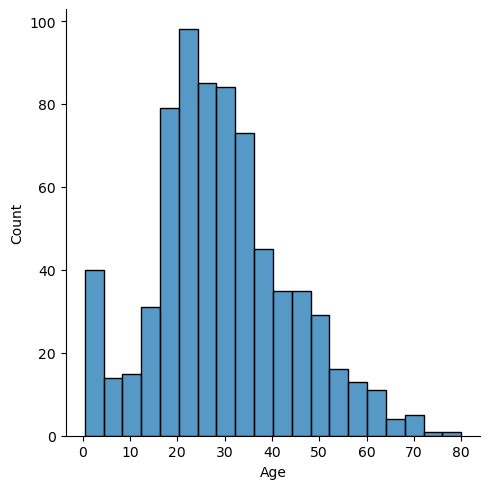

In [16]:
sns.displot(data['Age'])


In [17]:
data['Age'].mean()


29.69911764705882

In [18]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [19]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [20]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [21]:
data.dropna(inplace=True)


In [22]:
data.isna().sum().sort_values(ascending=False)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [23]:
data.shape

(889, 11)

# Unique Values

In [24]:
data.nunique()

PassengerId    889
Survived         2
Pclass           3
Name           889
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         680
Fare           247
Embarked         3
dtype: int64

In [25]:
def attribute_info(df_feature):
 
 print('Description of feature: ', '\n')
 print(df_feature.describe(), '\n')
 
 print('Value Counts of feature: ', '\n')
 print(df_feature.value_counts(), '\n')
 
 print('Unique Values of feature: ', '\n')
 print(df_feature.unique(), '\n')
 
 print('Missing Values of feature: ', '\n')
 print(df_feature.isna().sum(), '\n')
 
 print('Missing Values of feature in %: ', '\n')
 print(df_feature.isna().sum()/len(df_feature)*100, '\n')


In [26]:
for col in data:
 print('\033[1m' + 'Attribute_Name: ', col+'\033[0m')
 attribute_info(data[col])
 print('---------------------------------------------------------------')

Attribute_Name:  PassengerId
Description of feature:  

count    889.000000
mean     446.000000
std      256.998173
min        1.000000
25%      224.000000
50%      446.000000
75%      668.000000
max      891.000000
Name: PassengerId, dtype: float64 

Value Counts of feature:  

PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
302    1
303    1
304    1
305    1
891    1
Name: count, Length: 889, dtype: int64 

Unique Values of feature:  

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134

In [27]:
data.duplicated().sum()


0

# Data Visualization

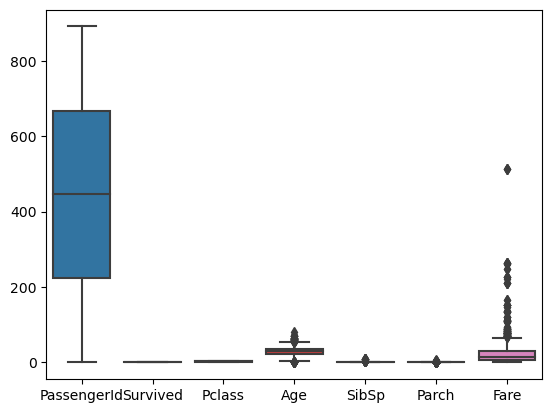

In [28]:
sns.boxplot(data)
rcParams['figure.figsize'] = 10, 6


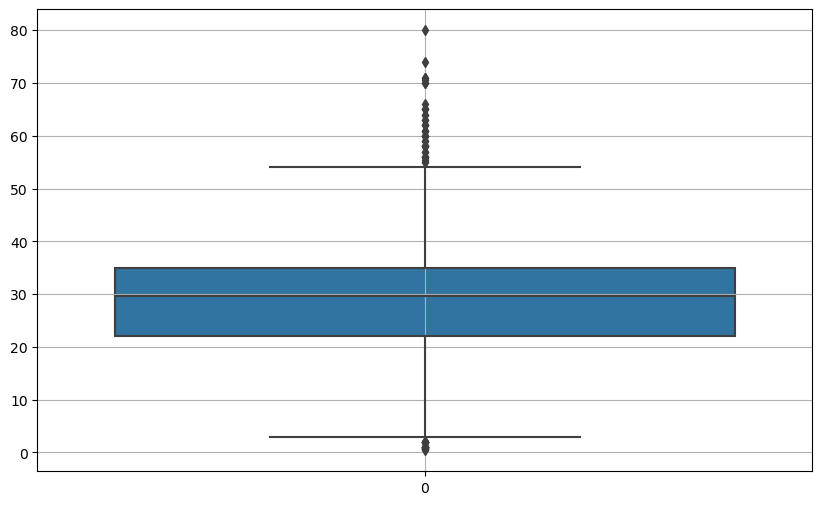

In [29]:
sns.boxplot(data['Age'])
plt.grid()


In [30]:
data[(data['Age'] < 4) | (data['Age'] > 54)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,16.0000,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,Q
33,34,0,2,"Wheadon, Mr. Edward H",male,66.00,0,0,C.A. 24579,10.5000,S
...,...,...,...,...,...,...,...,...,...,...,...
824,825,0,3,"Panula, Master. Urho Abraham",male,2.00,4,1,3101295,39.6875,S
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,S
851,852,0,3,"Svensson, Mr. Johan",male,74.00,0,0,347060,7.7750,S


In [31]:
age = data[(data['Age'] < 4) | (data['Age'] > 54)]['Age']
for i in age:
 print(i)


2.0
58.0
55.0
2.0
66.0
3.0
65.0
0.83
59.0
71.0
70.5
2.0
55.5
1.0
61.0
1.0
56.0
1.0
3.0
58.0
2.0
59.0
62.0
3.0
58.0
63.0
65.0
2.0
0.92
61.0
2.0
3.0
60.0
3.0
1.0
1.0
3.0
64.0
65.0
56.0
0.75
2.0
63.0
58.0
55.0
71.0
2.0
64.0
62.0
62.0
60.0
61.0
57.0
80.0
2.0
0.75
56.0
58.0
70.0
60.0
60.0
70.0
0.67
57.0
1.0
0.42
2.0
1.0
0.83
74.0
56.0


In [32]:
len(age)

71

In [33]:
data[(data['Age'] < 4) | (data['Age'] > 54)].index

Index([  7,  11,  15,  16,  33,  43,  54,  78,  94,  96, 116, 119, 152, 164,
       170, 172, 174, 183, 193, 195, 205, 232, 252, 261, 268, 275, 280, 297,
       305, 326, 340, 348, 366, 374, 381, 386, 407, 438, 456, 467, 469, 479,
       483, 487, 492, 493, 530, 545, 555, 570, 587, 625, 626, 630, 642, 644,
       647, 659, 672, 684, 694, 745, 755, 772, 788, 803, 824, 827, 831, 851,
       879],
      dtype='int64')

In [34]:
data.shape

(889, 11)

In [35]:
df = data.drop(index=[  7,  11,  15,  16,  33,  43,  54,  78,  94,  96, 116, 119, 152, 164,
       170, 172, 174, 183, 193, 195, 205, 232, 252, 261, 268, 275, 280, 297,
       305, 326, 340, 348, 366, 374, 381, 386, 407, 438, 456, 467, 469, 479,
       483, 487, 492, 493, 530, 545, 555, 570, 587, 625, 626, 630, 642, 644,
       647, 659, 672, 684, 694, 745, 755, 772, 788, 803, 824, 827, 831, 851,
       879], axis=0)

In [36]:
df.shape

(818, 11)

<Axes: >

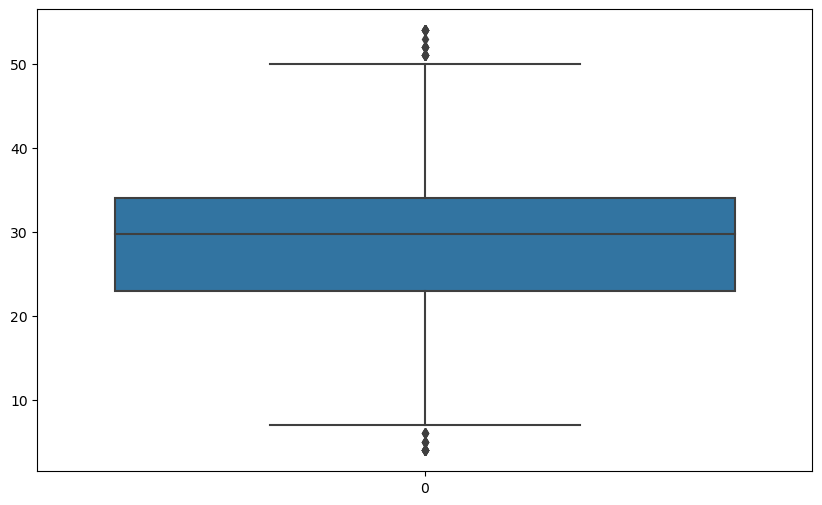

In [37]:
sns.boxplot(df['Age'])


In [38]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


# Checking the Correlation

In [39]:
data.select_dtypes(include=np.number).columns


Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [40]:
df = data[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
df


,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.000000,1,0,7.2500
1,2,1,38.000000,1,0,71.2833
2,3,3,26.000000,0,0,7.9250
3,4,1,35.000000,1,0,53.1000
4,5,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,887,2,27.000000,0,0,13.0000
887,888,1,19.000000,0,0,30.0000
888,889,3,29.699118,1,2,23.4500
889,890,1,26.000000,0,0,30.0000


In [41]:
df.corr()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.035330,0.030300,-0.057686,-0.001657,0.012703
Pclass,-0.035330,1.000000,-0.327954,0.081656,0.016824,-0.548193
Age,0.030300,-0.327954,1.000000,-0.231875,-0.178232,0.088604
SibSp,-0.057686,0.081656,-0.231875,1.000000,0.414542,0.160887
Parch,-0.001657,0.016824,-0.178232,0.414542,1.000000,0.217532
Fare,0.012703,-0.548193,0.088604,0.160887,0.217532,1.000000


<Axes: >

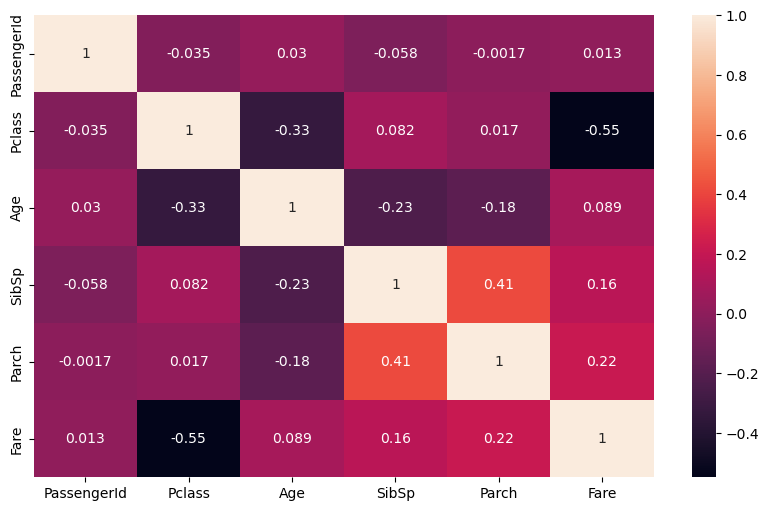

In [42]:
sns.heatmap(df.corr(), annot=True)


In [43]:
df.corr()['Age']

PassengerId    0.030300
Pclass        -0.327954
Age            1.000000
SibSp         -0.231875
Parch         -0.178232
Fare           0.088604
Name: Age, dtype: float64

In [44]:
data['Gender'] = data['Sex'].map({'male':0, 'female':1})


In [45]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,0


In [46]:
data.drop(columns=['Name', 'Sex', 'Ticket', 'Embarked'], axis=1, inplace=True)


In [47]:
data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.000000,1,0,7.2500,0
1,2,1,1,38.000000,1,0,71.2833,1
2,3,1,3,26.000000,0,0,7.9250,1
3,4,1,1,35.000000,1,0,53.1000,1
4,5,0,3,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0
887,888,1,1,19.000000,0,0,30.0000,1
888,889,0,3,29.699118,1,2,23.4500,1
889,890,1,1,26.000000,0,0,30.0000,0


In [48]:
data.isna().sum()


PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Gender         0
dtype: int64

In [49]:
data.duplicated().sum()

0

In [50]:
data.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
PassengerId,1.000000,-0.005028,-0.035330,0.030300,-0.057686,-0.001657,0.012703,-0.043136
Survived,-0.005028,1.000000,-0.335549,-0.074673,-0.034040,0.083151,0.255290,0.541585
Pclass,-0.035330,-0.335549,1.000000,-0.327954,0.081656,0.016824,-0.548193,-0.127741
Age,0.030300,-0.074673,-0.327954,1.000000,-0.231875,-0.178232,0.088604,-0.089434
SibSp,-0.057686,-0.034040,0.081656,-0.231875,1.000000,0.414542,0.160887,0.116348
Parch,-0.001657,0.083151,0.016824,-0.178232,0.414542,1.000000,0.217532,0.247508
Fare,0.012703,0.255290,-0.548193,0.088604,0.160887,0.217532,1.000000,0.179958
Gender,-0.043136,0.541585,-0.127741,-0.089434,0.116348,0.247508,0.179958,1.000000


<Axes: >

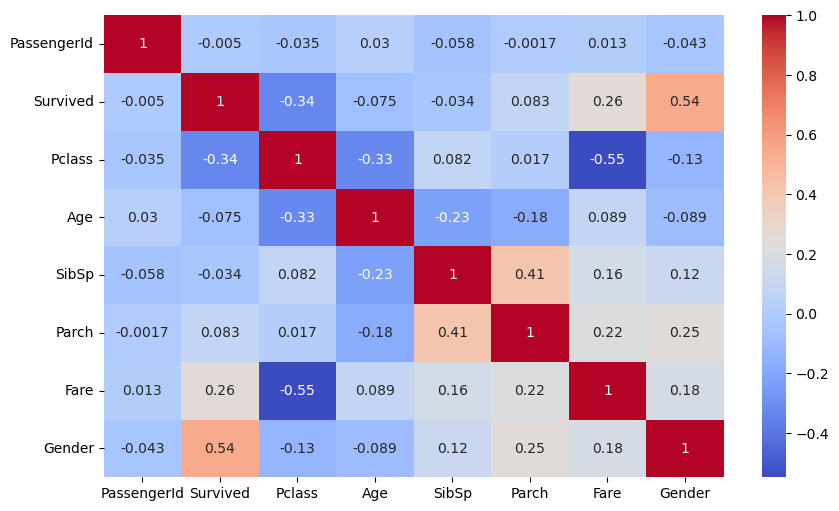

In [51]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


# Find the correlation w. r. to dependent variable

In [52]:
data.corr()['Survived']


PassengerId   -0.005028
Survived       1.000000
Pclass        -0.335549
Age           -0.074673
SibSp         -0.034040
Parch          0.083151
Fare           0.255290
Gender         0.541585
Name: Survived, dtype: float64

# Model Building


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [54]:
data.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Gender'],
      dtype='object')

In [55]:
X = data[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender']]
X


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,3,22.000000,1,0,7.2500,0
1,2,1,38.000000,1,0,71.2833,1
2,3,3,26.000000,0,0,7.9250,1
3,4,1,35.000000,1,0,53.1000,1
4,5,3,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,887,2,27.000000,0,0,13.0000,0
887,888,1,19.000000,0,0,30.0000,1
888,889,3,29.699118,1,2,23.4500,1
889,890,1,26.000000,0,0,30.0000,0


In [56]:
y = data['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

# Split our data into train and test


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [58]:
X_train


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Gender
486,487,1,35.000000,1,0,90.0000,1
293,294,3,24.000000,0,0,8.8500,1
173,174,3,21.000000,0,0,7.9250,0
450,451,2,36.000000,1,2,27.7500,0
361,362,2,29.000000,1,0,27.7208,0
...,...,...,...,...,...,...,...
107,108,3,29.699118,0,0,7.7750,0
271,272,3,25.000000,0,0,0.0000,0
862,863,1,48.000000,0,0,25.9292,1
436,437,3,21.000000,2,2,34.3750,1


In [59]:
X_test


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Gender
281,282,3,28.000000,0,0,7.8542,0
435,436,1,14.000000,1,2,120.0000,1
39,40,3,14.000000,1,0,11.2417,1
418,419,2,30.000000,0,0,13.0000,0
585,586,1,18.000000,0,2,79.6500,1
...,...,...,...,...,...,...,...
454,455,3,29.699118,0,0,8.0500,0
632,633,1,32.000000,0,0,30.5000,0
693,694,3,25.000000,0,0,7.2250,0
741,742,1,36.000000,1,0,78.8500,0


In [60]:
y_train


486    1
293    0
173    0
450    0
361    0
      ..
107    1
271    1
862    1
436    0
103    0
Name: Survived, Length: 622, dtype: int64

In [61]:
y_test


281    0
435    1
39     1
418    0
585    1
      ..
454    0
632    1
693    0
741    0
430    1
Name: Survived, Length: 267, dtype: int64

In [62]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [63]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


In [64]:
y_train


486    1
293    0
173    0
450    0
361    0
      ..
107    1
271    1
862    1
436    0
103    0
Name: Survived, Length: 622, dtype: int64

In [65]:
y_pred_train


array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,

In [66]:
y_test

281    0
435    1
39     1
418    0
585    1
      ..
454    0
632    1
693    0
741    0
430    1
Name: Survived, Length: 267, dtype: int64

In [67]:
y_pred_test


array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

# Training Set Evaluation


In [68]:
confusion_matrix(y_train, y_pred_train)

array([[331,  51],
       [ 74, 166]], dtype=int64)

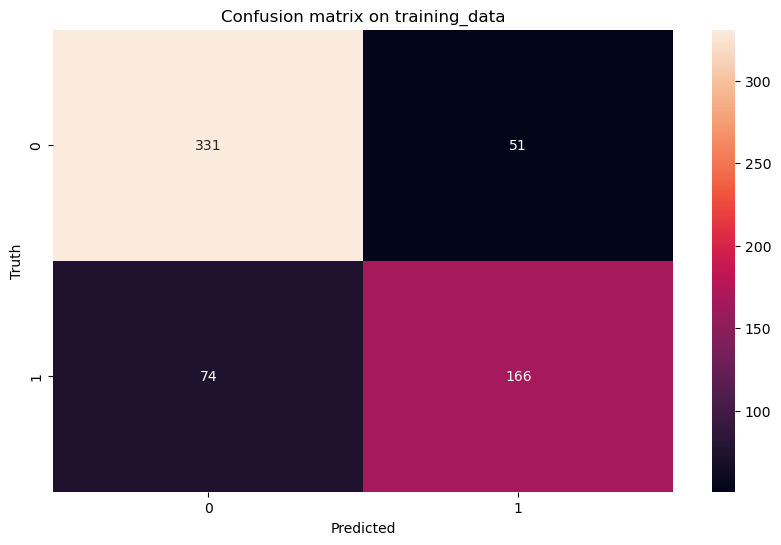

----------------------------
TP: 166
TN: 331
FP: 51
FN: 74


accuracy: 0.7990353697749196
F1-score: 0.7264770240700218
Precision: 0.7649769585253456
Recall: 0.6916666666666667


In [69]:
# on training data
sns.heatmap(confusion_matrix(y_train,y_pred_train), annot=True, fmt='d')
plt.title('Confusion matrix on training_data')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print("----------------------------")
tn, fp, fn, tp = confusion_matrix(y_train,y_pred_train).ravel()
print('TP: {}'.format(tp))
print('TN: {}'.format(tn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))
print('\n')
print('accuracy: {}'.format((tp+tn)/(tp+tn+fp+fn)))
print('F1-score: {}'.format(f1_score(y_train, y_pred_train)))
print('Precision: {}'.format(precision_score(y_train,y_pred_train)))
print('Recall: {}'.format(recall_score(y_train,y_pred_train)))

# Test Set Evaluation


In [70]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       167
           1       0.73      0.69      0.71       100

    accuracy                           0.79       267
   macro avg       0.78      0.77      0.77       267
weighted avg       0.79      0.79      0.79       267



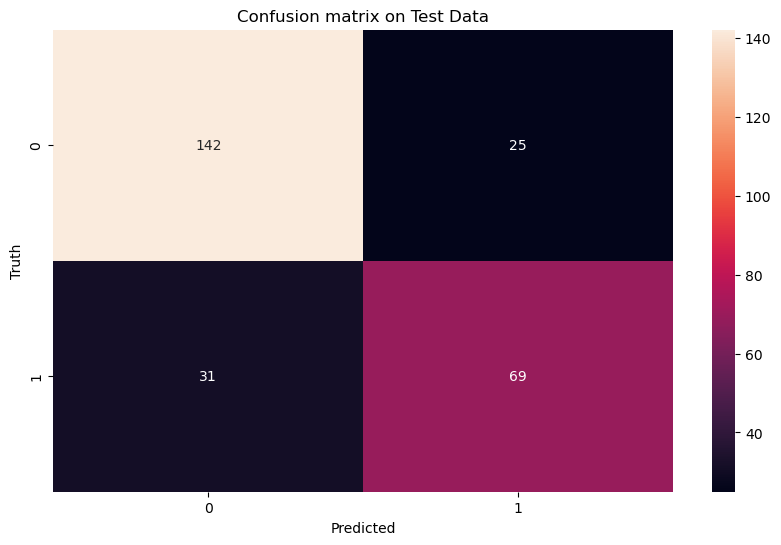

----------------------------
TP: 69
TN: 142
FP: 25
FN: 31


accuracy: 0.7902621722846442
F1-score: 0.711340206185567
Precision: 0.7340425531914894
Recall: 0.69


In [71]:
sns.heatmap(confusion_matrix(y_test,y_pred_test), annot=True, fmt='d')
plt.title('Confusion matrix on Test Data')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print("----------------------------")
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_test).ravel()
print('TP: {}'.format(tp))
print('TN: {}'.format(tn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))
print('\n')
print('accuracy: {}'.format((tp+tn)/(tp+tn+fp+fn)))
print('F1-score: {}'.format(f1_score(y_test,y_pred_test)))
print('Precision: {}'.format(precision_score(y_test,y_pred_test)))
print('Recall: {}'.format(recall_score(y_test,y_pred_test)))


# Improve the model performance using Hyperparameter Tuning

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [73]:
X_train.shape, X_test.shape


((711, 7), (178, 7))

In [74]:
# Define the hyperparameters to tune
hyperparameters = {
 'penalty': ['l1', 'l2', 'elasticnet'], # Regularization penalty ('l1' or 'l2')
 'solver': ['newton-cg', 'lbfgs', 'liblinear'], # Solve the optimization problem 
 'C': [1.0, 0.1, 0.01], # Inverse of regularization strength
 'max_iter': [100, 200, 500, 1000]
}
hyperparameters

{'penalty': ['l1', 'l2', 'elasticnet'],
 'solver': ['newton-cg', 'lbfgs', 'liblinear'],
 'C': [1.0, 0.1, 0.01],
 'max_iter': [100, 200, 500, 1000]}

In [75]:
from sklearn.model_selection import GridSearchCV


In [76]:
# Create a logistic regression classifier
classifier = LogisticRegression()
# Perform grid search with cross-validation
grid_search = GridSearchCV(classifier, hyperparameters, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 0.1, 0.01],
                         'max_iter': [100, 200, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

In [77]:
grid_search.best_params_


{'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [78]:
grid_search.best_score_

0.8029843396040579

In [79]:
grid_search.best_estimator_


LogisticRegression(solver='newton-cg')

In [80]:
# Print the best hyperparameters and the corresponding accuracy score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy Score: ", grid_search.best_score_)
print('\n')
# Evaluate the model with the best hyperparameters on the train set
best_classifier = grid_search.best_estimator_
y_train_pred = best_classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy: ", accuracy)
# Evaluate the model with the best hyperparameters on the test set
best_classifier = grid_search.best_estimator_
y_test_pred = best_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy: ", accuracy)


Best Hyperparameters:  {'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Accuracy Score:  0.8029843396040579


Train Accuracy:  0.8002812939521801
Test Accuracy:  0.7865168539325843


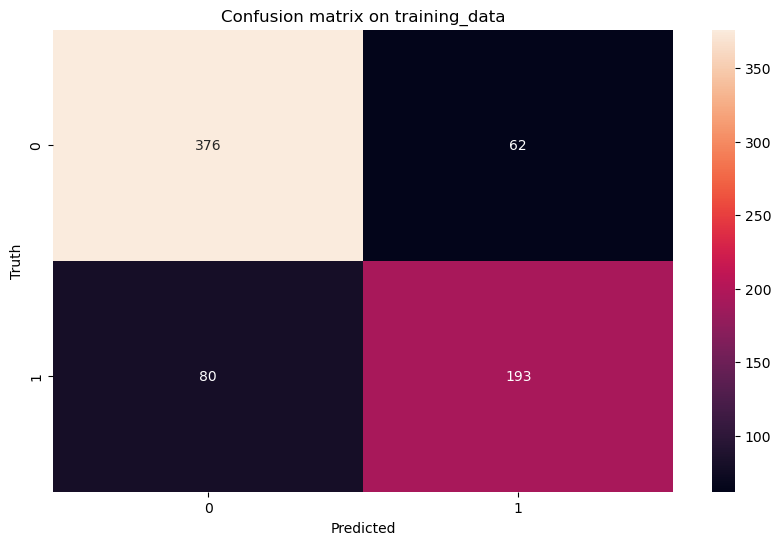

----------------------------
TP: 193
TN: 376
FP: 62
FN: 80


accuracy: 0.8002812939521801
F1-score: 0.731060606060606
Precision: 0.7568627450980392
Recall: 0.706959706959707


In [81]:
# on training data
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='d')
plt.title('Confusion matrix on training_data')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print("----------------------------")
tn, fp, fn, tp = confusion_matrix(y_train,y_train_pred).ravel()
print('TP: {}'.format(tp))
print('TN: {}'.format(tn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))
print('\n')
print('accuracy: {}'.format((tp+tn)/(tp+tn+fp+fn)))
print('F1-score: {}'.format(f1_score(y_train, y_train_pred)))
print('Precision: {}'.format(precision_score(y_train,y_train_pred)))
print('Recall: {}'.format(recall_score(y_train,y_train_pred)))


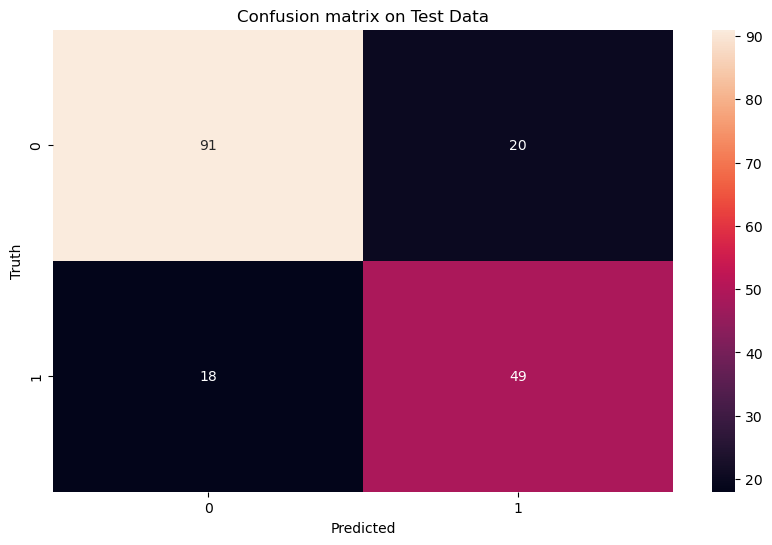

----------------------------
TP: 49
TN: 91
FP: 20
FN: 18


accuracy: 0.7865168539325843
F1-score: 0.7205882352941175
Precision: 0.7101449275362319
Recall: 0.7313432835820896


In [82]:
# On test data
sns.heatmap(confusion_matrix(y_test,y_test_pred), annot=True, fmt='d')
plt.title('Confusion matrix on Test Data')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print("----------------------------")
tn, fp, fn, tp = confusion_matrix(y_test,y_test_pred).ravel()
print('TP: {}'.format(tp))
print('TN: {}'.format(tn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))
print('\n')
print('accuracy: {}'.format((tp+tn)/(tp+tn+fp+fn)))
print('F1-score: {}'.format(f1_score(y_test,y_test_pred)))
print('Precision: {}'.format(precision_score(y_test,y_test_pred)))
print('Recall: {}'.format(recall_score(y_test,y_test_pred)))


In [85]:
# Function to provide a conclusion based on accuracy
def project_conclusion(train_accuracy, test_accuracy):
    if test_accuracy > train_accuracy:
        print("Conclusion: The model is performing well on both training and testing sets.")
    elif test_accuracy >= 0.7:
        print("Conclusion: The model shows a decent performance on the testing set.")
    else:
        print("Conclusion: The model might need further improvement as it shows lower accuracy on the testing set.")

    # Display the accuracy
    print(f"Training Accuracy: {train_accuracy:.2f}")
    print(f"Testing Accuracy: {test_accuracy:.2f}")

# Call the function with your accuracy values
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

project_conclusion(train_accuracy, test_accuracy)


Conclusion: The model shows a decent performance on the testing set.
Training Accuracy: 0.80
Testing Accuracy: 0.79
